I will be playing the role of an Analytics Consultant for Massachusetts General Hospital (MGH). I have been asked to build a high-level KPI report for the executive team, based on a subset of patient records. The purpose of the report is to give stakeholders visibility into the hospital's recent performance, and answer the following questions:

- How many patients have been admitted or readmitted over time?
- How long are patients staying in the hospital, on average?
- How much is the average cost per visit?
- How many procedures are covered by insurance?

The CEO has asked me to summarize any insights that I can derive from the sample provided.

###### The dataset for this project has been retrieved from the mavenanalytics.io website. This is synthetic data on roughly 1000 patients of Massachussets General Hospital from the years of 2011 through 2022, which includes information on patient demographics, insurance coverage, and medical encounter and procedures.

**Importing Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style 
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")


**Loading Data Into a DataFrame**

In [4]:
encounters = pd.read_csv(r"C:\Users\mjaso\Downloads\Hospital+Patient+Records\Hospital_Patient_Record_Folder\encounters.csv")
organizations = pd.read_csv(r"C:\Users\mjaso\Downloads\Hospital+Patient+Records\Hospital_Patient_Record_Folder\organizations.csv")
patients = pd.read_csv(r"C:\Users\mjaso\Downloads\Hospital+Patient+Records\Hospital_Patient_Record_Folder\patients.csv")
payers = pd.read_csv(r"C:\Users\mjaso\Downloads\Hospital+Patient+Records\Hospital_Patient_Record_Folder\payers.csv")
procedures = pd.read_csv(r"C:\Users\mjaso\Downloads\Hospital+Patient+Records\Hospital_Patient_Record_Folder\procedures.csv")



In [5]:
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


In [6]:
encounters.tail()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN
27890,64dfd3ce-7123-fa23-ec24-f74b492553e2,2022-02-05T20:27:36Z,2022-02-05T20:42:36Z,e2d8e1ed-6f63-54e2-d14e-8346799e92ef,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,308646001,Death Certification,136.80,0.00,0.00,88805009.0,Chronic congestive heart failure (disorder)


In [7]:
organizations.head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON
0,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,42.362813,-71.069187


In [8]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813


In [9]:
payers.head()

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583


In [10]:
procedures.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005.0,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006.0,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN


For a few of the dataframes that were imported, I will need to perform some data cleaning. For the 'encouters' dataframe, I will need to remove the non numeric characters from the 'START' and 'STOP' columns so I can extract the date and time values and store them in thier own dedicated columns. For the 'patients' dataframe, I will need to remove the numeric characters from the 'FIRST', 'LAST', and 'MAIDEN' columns, and extract the country from the 'BIRTHPLACE' column, and then store them in thier own seperate columns. I will also need to convert the 'BIRTHDATE' and 'DEATHDATE' columns into datetime datatypes. The last dataframe that I need to perform data cleaning on is the 'procedures' dataframe. I will also remove any non numeric characters from the 'START' and 'STOP' columns and extract the date and time values from those columns to store them in new columns.

### DATA CLEANING

**Removing The Non-Numeric Characters From The 'START' and 'Stop' Columns Of The 'encounters' Dataframe, and Storing The Values In New Columns Named "Encounters_Start' and 'Encounters_Stop'**

In [11]:
encounters["Encounters_Start"] = encounters["START"].replace({"[T]": " "}, regex=True)
encounters["Encounters_Start"] = encounters["Encounters_Start"].replace({"[Z]": " "}, regex=True)
encounters["Encounters_Start"][:5].reset_index()

,index,Encounters_Start
0,0,2011-01-02 09:26:36
1,1,2011-01-03 05:44:39
2,2,2011-01-03 14:32:11
3,3,2011-01-03 16:24:45
4,4,2011-01-03 17:36:53


In [12]:
encounters["Encounters_Stop"] = encounters["STOP"].replace({"[T]": " "}, regex=True)
encounters["Encounters_Stop"] = encounters["Encounters_Stop"].replace({"[Z]": " "}, regex=True)
encounters["Encounters_Stop"][:5].reset_index()

,index,Encounters_Stop
0,0,2011-01-02 12:58:36
1,1,2011-01-03 06:01:42
2,2,2011-01-03 14:47:11
3,3,2011-01-03 16:39:45
4,4,2011-01-03 17:51:53


**Converting The 'Encounters_Start' and 'Encounters_Stop' Columns To Datetime Format**

In [13]:
encounters["Encounters_Start"] = pd.to_datetime(encounters["Encounters_Start"])
encounters["Encounters_Stop"] = pd.to_datetime(encounters["Encounters_Stop"])

**Checking That The New Columns Datatypes Have Been Converted**

In [14]:
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   27891 non-null  object        
 1   START                27891 non-null  object        
 2   STOP                 27891 non-null  object        
 3   PATIENT              27891 non-null  object        
 4   ORGANIZATION         27891 non-null  object        
 5   PAYER                27891 non-null  object        
 6   ENCOUNTERCLASS       27891 non-null  object        
 7   CODE                 27891 non-null  int64         
 8   DESCRIPTION          27891 non-null  object        
 9   BASE_ENCOUNTER_COST  27891 non-null  float64       
 10  TOTAL_CLAIM_COST     27891 non-null  float64       
 11  PAYER_COVERAGE       27891 non-null  float64       
 12  REASONCODE           8350 non-null   float64       
 13  REASONDESCRIPTION    8350 non-n

I will create 4 new columns, 'Start_Date', 'Start_Time', 'Stop_Date', and 'Stop_Time' to seperate the start and stop date and times into sepearte columns and verify the changes.

In [15]:
encounters["Start_Date"] = encounters["Encounters_Start"].dt.date
encounters["Start_Time"] = encounters["Encounters_Start"].dt.time
encounters["Stop_Date"] = encounters["Encounters_Stop"].dt.date
encounters["Stop_Time"] = encounters["Encounters_Stop"].dt.time

In [16]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'Encounters_Start', 'Encounters_Stop', 'Start_Date', 'Start_Time',
       'Stop_Date', 'Stop_Time'],
      dtype='object')

Perfect, the new columns have been added to the dataframe. 

Now I will move on to the 'patients' dataframe and remove the numeric characters from the 'FIRST', 'LAST', and 'MAIDEN' columns, as well as extract the country from the 'BIRTHPLACE' column.

To begin, I will need to convert the new columns into string datatypes so I can manipulate the characters within that string.

In [17]:
patients["First_Name"] = patients["FIRST"].astype(str)
patients["Last_Name"] = patients["LAST"].astype(str)
patients["Maiden_Name"] = patients["MAIDEN"].astype(str)
patients["Birth_Country"] = patients["BIRTHPLACE"].astype(str)

Now that those new columns have been created, I will now move on to removing all of the numeric characters from those columns, as well as extract the country from the 'BIRTHPLACE' column and place the values into their own column.

In [18]:
patients["First_Name"] = patients["First_Name"].replace({"[0-9]": " "}, regex=True)
patients["Last_Name"] = patients["Last_Name"].replace({"[0-9]": " "}, regex=True)
patients["Maiden_Name"] = patients["Maiden_Name"].replace({"[0-9]": " "}, regex=True)
patients["Birth_Country"] = patients["Birth_Country"].str[-2:]

**Viewing The First Few Rows Of The 'Birth_Country' Column To Make Sure Changes Were Made**

In [19]:
patients["Birth_Country"][:3]

0    US
1    US
2    US
Name: Birth_Country, dtype: object

Perfect, now I will preview a few rows of the 'First_Name', 'Last_Name', and 'Maiden_Name' columns to verify that the changes were sucessfully made.

In [20]:
patients["First_Name"][:3]

0    Nikita   
1      Zane   
2     Quinn   
Name: First_Name, dtype: object

In [21]:
patients["Last_Name"][:3]

0        Erdman   
1    Hodkiewicz   
2     Marquardt   
Name: Last_Name, dtype: object

In [22]:
patients["Maiden_Name"][:3]

0    Leannon  
1          nan
2          nan
Name: Maiden_Name, dtype: object

I will convert the columns 'BIRTHDATE' and 'DEATHDATE' into datetime datatypes now.

In [23]:
patients["BIRTHDATE"] = pd.to_datetime(patients["BIRTHDATE"])
patients["DEATHDATE"] = pd.to_datetime(patients["DEATHDATE"])

**Checking The Datatypes Of The 'patients' Dataframe To Verify That Datatypes Have Been Converted Correctly**

In [24]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             974 non-null    object        
 1   BIRTHDATE      974 non-null    datetime64[ns]
 2   DEATHDATE      154 non-null    datetime64[ns]
 3   PREFIX         974 non-null    object        
 4   FIRST          974 non-null    object        
 5   LAST           974 non-null    object        
 6   SUFFIX         21 non-null     object        
 7   MAIDEN         386 non-null    object        
 8   MARITAL        973 non-null    object        
 9   RACE           974 non-null    object        
 10  ETHNICITY      974 non-null    object        
 11  GENDER         974 non-null    object        
 12  BIRTHPLACE     974 non-null    object        
 13  ADDRESS        974 non-null    object        
 14  CITY           974 non-null    object        
 15  STATE          974 non-

Perfect!

The last dataframe that needs to be cleaned is the 'procedures' dataframe. First I will remove any non numeric characters from the values in the 'START' and 'STOP' columns, and then I will convert those columns into datetime datatypes. Finally, I will extract the date and time from those columns and store them in their own new columns named 'Procedure_Start_Date', 'Procedure_Stop_Date', 'Procedure_Start_Time', and 'Procedure_Stop_Time'.

**Removing Non Numeric Characters From Original Columns and Assigning The Results To New Columns**

In [25]:
procedures["Procedures_Start"] = procedures["START"].replace({"[T]": " "}, regex=True)
procedures["Procedures_Start"] = procedures["Procedures_Start"].replace({"[Z]": " "}, regex=True)
procedures["Procedures_Start"][:5].reset_index()

,index,Procedures_Start
0,0,2011-01-02 09:26:36
1,1,2011-01-03 05:44:39
2,2,2011-01-04 14:49:55
3,3,2011-01-05 04:02:09
4,4,2011-01-05 12:58:36


In [26]:
procedures["Procedures_Stop"] = procedures["STOP"].replace({"[T]": " "}, regex=True)
procedures["Procedures_Stop"] = procedures["Procedures_Stop"].replace({"[Z]": " "}, regex=True)
procedures["Procedures_Stop"][:5].reset_index()

,index,Procedures_Stop
0,0,2011-01-02 12:58:36
1,1,2011-01-03 06:01:42
2,2,2011-01-04 15:04:55
3,3,2011-01-05 04:17:09
4,4,2011-01-05 16:42:36


**Converting 'Procedures_Start' and 'Procedures_Stop' Columns Into Datetime Datatypes**

In [27]:
procedures["Procedures_Start"] = pd.to_datetime(procedures["Procedures_Start"])
procedures["Procedures_Stop"] = pd.to_datetime(procedures["Procedures_Stop"])

**Verifying That The Changes Were Made**

In [28]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47701 entries, 0 to 47700
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   START              47701 non-null  object        
 1   STOP               47701 non-null  object        
 2   PATIENT            47701 non-null  object        
 3   ENCOUNTER          47701 non-null  object        
 4   CODE               47701 non-null  int64         
 5   DESCRIPTION        47701 non-null  object        
 6   BASE_COST          47701 non-null  int64         
 7   REASONCODE         10756 non-null  float64       
 8   REASONDESCRIPTION  10756 non-null  object        
 9   Procedures_Start   47701 non-null  datetime64[ns]
 10  Procedures_Stop    47701 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 4.0+ MB


As we can see, the 'Procedures_Start' and 'Procedures_Stop' columns have been converted to the correct datatypes.

Now I will seperate the date and time values from those columns into their own seperate columns.

In [29]:
procedures["Procedures_Start_Date"] = procedures["Procedures_Start"].dt.date
procedures["Procedures_Start_Time"] = procedures["Procedures_Start"].dt.time
procedures["Procedures_Stop_Date"] = procedures["Procedures_Stop"].dt.date 
procedures["Procedures_Stop_Time"] = procedures["Procedures_Stop"].dt.time 


**Verifying The Columns Have Been Added**

In [30]:
procedures["Procedures_Start_Date"][:3]

0    2011-01-02
1    2011-01-03
2    2011-01-04
Name: Procedures_Start_Date, dtype: object

In [31]:
procedures["Procedures_Start_Time"][:3]

0    09:26:36
1    05:44:39
2    14:49:55
Name: Procedures_Start_Time, dtype: object

In [32]:
procedures["Procedures_Stop_Date"][:3]

0    2011-01-02
1    2011-01-03
2    2011-01-04
Name: Procedures_Stop_Date, dtype: object

In [33]:
procedures["Procedures_Stop_Time"][:3]

0    12:58:36
1    06:01:42
2    15:04:55
Name: Procedures_Stop_Time, dtype: object

### DATA EXAMINATION

I will also examine each dataframe a little further by checking for duplicate rows of data, the number of null values, and the number of unique values. It will be helpful to get a better understanding of the data by looking at the statistical information of the numerical and categorical columns also.

**Checking Each Dataframe for Duplicate Values**

In [34]:
encounters_duplicated = encounters.duplicated().sum()
organizations_duplicated = organizations.duplicated().sum()
patients_duplicated = patients.duplicated().sum()
payers_duplicated = payers.duplicated().sum()
procedures_duplicated = procedures.duplicated().sum()

In [35]:
print(f"The dataframe 'encounters' has {encounters_duplicated} rows of duplicated data.") 
print(f"The dataframe 'organizations' has {organizations_duplicated} rows of duplicated data.") 
print(f"The dataframe 'patients' has {patients_duplicated} rows of duplicated data.") 
print(f"The dataframe 'payers' has {payers_duplicated} rows of duplicated data.") 
print(f"The dataframe 'procedures' has {procedures_duplicated} rows of duplicated data.") 

The dataframe 'encounters' has 0 rows of duplicated data.
The dataframe 'organizations' has 0 rows of duplicated data.
The dataframe 'patients' has 0 rows of duplicated data.
The dataframe 'payers' has 0 rows of duplicated data.
The dataframe 'procedures' has 0 rows of duplicated data.


There are no duplicate rows of data in any of the dataframes.

I will now use a loop to iterate through each column of each dataframe to count how many null values each dataframe has.

**Checking for Null Values**

###### **'encounters' dataframe**

In [36]:
for na in encounters.columns:
    null_val = encounters[na].isnull().sum()
    print(f"There are {null_val} Nulls in the column {na}.") 

There are 0 Nulls in the column Id.
There are 0 Nulls in the column START.
There are 0 Nulls in the column STOP.
There are 0 Nulls in the column PATIENT.
There are 0 Nulls in the column ORGANIZATION.
There are 0 Nulls in the column PAYER.
There are 0 Nulls in the column ENCOUNTERCLASS.
There are 0 Nulls in the column CODE.
There are 0 Nulls in the column DESCRIPTION.
There are 0 Nulls in the column BASE_ENCOUNTER_COST.
There are 0 Nulls in the column TOTAL_CLAIM_COST.
There are 0 Nulls in the column PAYER_COVERAGE.
There are 19541 Nulls in the column REASONCODE.
There are 19541 Nulls in the column REASONDESCRIPTION.
There are 0 Nulls in the column Encounters_Start.
There are 0 Nulls in the column Encounters_Stop.
There are 0 Nulls in the column Start_Date.
There are 0 Nulls in the column Start_Time.
There are 0 Nulls in the column Stop_Date.
There are 0 Nulls in the column Stop_Time.


###### **'organizations' dataframe**

In [37]:
for na in organizations.columns:
    na_value = organizations[na].isnull().sum()
    print(f"There are {na_value} Nulls in the column {na}.") 

There are 0 Nulls in the column Id.
There are 0 Nulls in the column NAME.
There are 0 Nulls in the column ADDRESS.
There are 0 Nulls in the column CITY.
There are 0 Nulls in the column STATE.
There are 0 Nulls in the column ZIP.
There are 0 Nulls in the column LAT.
There are 0 Nulls in the column LON.


###### **'patients' dataframe**

In [38]:
for na in patients.columns:
    na_value = patients[na].isna().sum()
    print(f"There are {na_value} Nulls in the column {na}.") 

There are 0 Nulls in the column Id.
There are 0 Nulls in the column BIRTHDATE.
There are 820 Nulls in the column DEATHDATE.
There are 0 Nulls in the column PREFIX.
There are 0 Nulls in the column FIRST.
There are 0 Nulls in the column LAST.
There are 953 Nulls in the column SUFFIX.
There are 588 Nulls in the column MAIDEN.
There are 1 Nulls in the column MARITAL.
There are 0 Nulls in the column RACE.
There are 0 Nulls in the column ETHNICITY.
There are 0 Nulls in the column GENDER.
There are 0 Nulls in the column BIRTHPLACE.
There are 0 Nulls in the column ADDRESS.
There are 0 Nulls in the column CITY.
There are 0 Nulls in the column STATE.
There are 0 Nulls in the column COUNTY.
There are 142 Nulls in the column ZIP.
There are 0 Nulls in the column LAT.
There are 0 Nulls in the column LON.
There are 0 Nulls in the column First_Name.
There are 0 Nulls in the column Last_Name.
There are 0 Nulls in the column Maiden_Name.
There are 0 Nulls in the column Birth_Country.


###### **'payers' dataframe**

In [39]:
for na in payers.columns:
    na_value = payers[na].isna().sum()
    print(f"There are {na_value} Nulls in the column {na}.") 

There are 0 Nulls in the column Id.
There are 0 Nulls in the column NAME.
There are 1 Nulls in the column ADDRESS.
There are 1 Nulls in the column CITY.
There are 1 Nulls in the column STATE_HEADQUARTERED.
There are 1 Nulls in the column ZIP.
There are 1 Nulls in the column PHONE.


###### **'procedures' dataframe**

In [40]:
for na in procedures.columns:
    na_value = procedures[na].isnull().sum()
    print(f"There are {na_value} Nulls in the column {na}.") 

There are 0 Nulls in the column START.
There are 0 Nulls in the column STOP.
There are 0 Nulls in the column PATIENT.
There are 0 Nulls in the column ENCOUNTER.
There are 0 Nulls in the column CODE.
There are 0 Nulls in the column DESCRIPTION.
There are 0 Nulls in the column BASE_COST.
There are 36945 Nulls in the column REASONCODE.
There are 36945 Nulls in the column REASONDESCRIPTION.
There are 0 Nulls in the column Procedures_Start.
There are 0 Nulls in the column Procedures_Stop.
There are 0 Nulls in the column Procedures_Start_Date.
There are 0 Nulls in the column Procedures_Start_Time.
There are 0 Nulls in the column Procedures_Stop_Date.
There are 0 Nulls in the column Procedures_Stop_Time.


I will also iterate through the columns in each dataframe to check for the number of unique values each column has.

**Checking Unique Values**

###### **'encounters' dataframe**

In [41]:
for uni in encounters.columns:
    uni_val = encounters[uni].nunique()
    print(f"The column {uni} has {uni_val} Unique values.") 

The column Id has 27891 Unique values.
The column START has 27541 Unique values.
The column STOP has 27765 Unique values.
The column PATIENT has 974 Unique values.
The column ORGANIZATION has 1 Unique values.
The column PAYER has 10 Unique values.
The column ENCOUNTERCLASS has 6 Unique values.
The column CODE has 45 Unique values.
The column DESCRIPTION has 53 Unique values.
The column BASE_ENCOUNTER_COST has 5 Unique values.
The column TOTAL_CLAIM_COST has 13529 Unique values.
The column PAYER_COVERAGE has 5606 Unique values.
The column REASONCODE has 73 Unique values.
The column REASONDESCRIPTION has 73 Unique values.
The column Encounters_Start has 27541 Unique values.
The column Encounters_Stop has 27765 Unique values.
The column Start_Date has 4032 Unique values.
The column Start_Time has 7710 Unique values.
The column Stop_Date has 4032 Unique values.
The column Stop_Time has 9015 Unique values.


###### **'organizations' dataframe**

In [42]:
for uni in organizations.columns:
    uni_val = organizations[uni].nunique()
    print(f"The column {uni} has {uni_val} Unique values.") 

The column Id has 1 Unique values.
The column NAME has 1 Unique values.
The column ADDRESS has 1 Unique values.
The column CITY has 1 Unique values.
The column STATE has 1 Unique values.
The column ZIP has 1 Unique values.
The column LAT has 1 Unique values.
The column LON has 1 Unique values.


###### **'patients' dataframe**

In [43]:
for uni in patients.columns:
    uni_val = patients[uni].nunique()
    print(f"The column {uni} has {uni_val} Unique values.") 

The column Id has 974 Unique values.
The column BIRTHDATE has 880 Unique values.
The column DEATHDATE has 148 Unique values.
The column PREFIX has 3 Unique values.
The column FIRST has 842 Unique values.
The column LAST has 498 Unique values.
The column SUFFIX has 3 Unique values.
The column MAIDEN has 279 Unique values.
The column MARITAL has 2 Unique values.
The column RACE has 6 Unique values.
The column ETHNICITY has 2 Unique values.
The column GENDER has 2 Unique values.
The column BIRTHPLACE has 297 Unique values.
The column ADDRESS has 974 Unique values.
The column CITY has 29 Unique values.
The column STATE has 1 Unique values.
The column COUNTY has 5 Unique values.
The column ZIP has 70 Unique values.
The column LAT has 974 Unique values.
The column LON has 974 Unique values.
The column First_Name has 842 Unique values.
The column Last_Name has 498 Unique values.
The column Maiden_Name has 280 Unique values.
The column Birth_Country has 29 Unique values.


###### **'payers' dataframe

In [44]:
for uni in payers.columns:
    uni_val = payers[uni].nunique()
    print(f"The column {uni} has {uni_val} Unique values.")

The column Id has 10 Unique values.
The column NAME has 10 Unique values.
The column ADDRESS has 7 Unique values.
The column CITY has 7 Unique values.
The column STATE_HEADQUARTERED has 6 Unique values.
The column ZIP has 7 Unique values.
The column PHONE has 8 Unique values.


###### **'procedures' dataframe**

In [45]:
for uni in procedures.columns:
    uni_val = procedures[uni].nunique()
    print(f"The column {uni} has {uni_val} Unique values.")

The column START has 39251 Unique values.
The column STOP has 42263 Unique values.
The column PATIENT has 793 Unique values.
The column ENCOUNTER has 14670 Unique values.
The column CODE has 157 Unique values.
The column DESCRIPTION has 163 Unique values.
The column BASE_COST has 8268 Unique values.
The column REASONCODE has 46 Unique values.
The column REASONDESCRIPTION has 46 Unique values.
The column Procedures_Start has 39251 Unique values.
The column Procedures_Stop has 42263 Unique values.
The column Procedures_Start_Date has 3951 Unique values.
The column Procedures_Start_Time has 22701 Unique values.
The column Procedures_Stop_Date has 3952 Unique values.
The column Procedures_Stop_Time has 26965 Unique values.


Lastly, regarding the examination of the data, I will take a look at some statistical information relating to the numeric and categorical values of the columns in each dataframe.

**Checking Statistic Information**

###### **'encounters' dataframe**

In [46]:
encounters.describe()

,CODE,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE
count,2.789100e+04,27891.000000,27891.000000,27891.000000,8.350000e+03
mean,2.972670e+08,116.181614,3639.682174,1114.965652,4.751643e+11
std,2.017839e+08,28.410082,9205.595748,4768.615576,5.874089e+12
min,1.505002e+06,85.550000,0.000000,0.000000,5.602001e+06
25%,1.853450e+08,85.550000,142.580000,0.000000,5.582200e+07
50%,1.853490e+08,136.800000,278.580000,28.440000,8.880501e+07
75%,4.244410e+08,142.580000,1412.530000,155.770000,1.956620e+08
max,7.029270e+08,146.180000,641882.700000,247751.420000,1.241710e+14


In [47]:
encounters.describe(include="object") 

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,DESCRIPTION,REASONDESCRIPTION,Start_Date,Start_Time,Stop_Date,Stop_Time
count,27891,27891,27891,27891,27891,27891,27891,27891,8350,27891,27891,27891,27891
unique,27891,27541,27765,974,1,10,6,53,73,4032,7710,4032,9015
top,32c84703-2481-49cd-d571-3899d5820253,2016-12-08T10:00:40Z,2016-12-08T10:15:40Z,1712d26d-822d-1e3a-2267-0a9dba31d7c8,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,Encounter for problem (procedure),Chronic congestive heart failure (disorder),2014-02-06,16:58:48,2014-02-06,02:35:30
freq,1,3,3,1381,27891,11371,12537,4308,1738,57,444,55,327


###### **'organizations' dataframe**

In [48]:
organizations.describe()

,ZIP,LAT,LON
count,1.0,1.000000,1.000000
mean,2114.0,42.362813,-71.069187
std,NaN,NaN,NaN
min,2114.0,42.362813,-71.069187
25%,2114.0,42.362813,-71.069187
50%,2114.0,42.362813,-71.069187
75%,2114.0,42.362813,-71.069187
max,2114.0,42.362813,-71.069187


In [49]:
organizations.describe(include="object") 

,Id,NAME,ADDRESS,CITY,STATE
count,1,1,1,1,1
unique,1,1,1,1,1
top,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA
freq,1,1,1,1,1


###### **'patients' dataframe**

In [50]:
patients.describe()

,ZIP,LAT,LON
count,832.000000,974.000000,974.000000
mean,2152.421875,42.337359,-71.027524
std,75.462146,0.047594,0.069375
min,1801.000000,42.204921,-71.165648
25%,2121.000000,42.313366,-71.068002
50%,2135.000000,42.343794,-71.038397
75%,2163.000000,42.371594,-70.999202
max,2472.000000,42.495464,-70.730824


In [51]:
patients.describe(include="object") 

,Id,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,First_Name,Last_Name,Maiden_Name,Birth_Country
count,974,974,974,974,21,386,973,974,974,974,974,974,974,974,974,974,974,974,974
unique,974,3,842,498,3,279,2,6,2,2,297,974,29,1,5,842,498,280,29
top,5605b66b-e92d-c16c-1b83-b8bf7040d51f,Mr.,Domenic627,Heaney114,PhD,Jerde200,M,white,nonhispanic,M,Boston Massachusetts US,510 Little Station Unit 69,Boston,Massachusetts,Suffolk County,Domenic,Heaney,nan,US
freq,1,494,3,6,10,5,784,680,783,494,79,1,541,974,644,3,6,588,845


###### **'payers' dataframe**

In [52]:
payers.describe()

,ZIP
count,9.000000
mean,30839.444444
std,20243.644158
min,6002.000000
25%,21244.000000
50%,21244.000000
75%,46204.000000
max,60007.000000


In [53]:
payers.describe(include="object") 

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,PHONE
count,10,10,9,9,9,9
unique,10,10,7,7,6,8
top,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,1-877-267-2323
freq,1,1,3,3,3,2


###### **'procedures' dataframe**

In [54]:
procedures.describe()

,CODE,BASE_COST,REASONCODE
count,4.770100e+04,47701.000000,1.075600e+04
mean,1.098683e+14,2212.064967,3.342532e+11
std,9.057080e+14,5572.978748,4.748533e+12
min,1.225002e+06,1.000000,5.602001e+06
25%,2.251580e+08,431.000000,7.289200e+07
50%,4.153000e+08,431.000000,7.289200e+07
75%,7.629930e+08,966.000000,7.289200e+07
max,1.633503e+16,289531.000000,6.781100e+13


In [55]:
procedures.describe(include="object") 

,START,STOP,PATIENT,ENCOUNTER,DESCRIPTION,REASONDESCRIPTION,Procedures_Start_Date,Procedures_Start_Time,Procedures_Stop_Date,Procedures_Stop_Time
count,47701,47701,47701,47701,47701,10756,47701,47701,47701,47701
unique,39251,42263,793,14670,163,46,3951,22701,3952,26965
top,2013-09-30T22:31:23Z,2019-03-12T08:27:16Z,1712d26d-822d-1e3a-2267-0a9dba31d7c8,66b2ab44-a2cc-8053-8f4e-c5be57e50cc4,Assessment of health and social care needs (pr...,Normal pregnancy,2014-02-26,16:58:48,2014-02-26,17:13:48
freq,21,20,1783,186,4596,5718,67,521,66,468


Now that all of the dataframes have been cleaned and examined, I can now move on to answering the questions inquired by the stakeholders.

### QUESTIONS:
1) How many patients have been admitted or readmitted over time?

In [266]:
num_of_patients = encounters["Id"].nunique()
print(f"There have been {num_of_patients:,} patients admitted or readmitted overtime.") 

There have been 27,891 patients admitted or readmitted overtime.


2. How long are patients staying in the hospital, on average?

###### Avg Minutes Stayed in Hospital by Patients

In [57]:
avg_hospital_stay_mins = (encounters["Encounters_Stop"] - encounters["Encounters_Start"]) / pd.Timedelta(minutes=1)
avg_hospital_stay_mins = avg_hospital_stay_mins.mean()
print(f"The average patients stay in the hospital is {round(avg_hospital_stay_mins, 2)} minutes.")




The average patients stay in the hospital is 435.96 minutes.


###### Avg Hours Stayed in Hospital by Patients

In [58]:
avg_hospital_stay_hrs = (encounters.Encounters_Stop - encounters.Encounters_Start) / pd.Timedelta(hours=1)
avg_hospital_stay_hrs = avg_hospital_stay_hrs.mean()
print(f"The average patients stay in the hospital is {round(avg_hospital_stay_hrs, 2)} hours.") 

The average patients stay in the hospital is 7.27 hours.


3) How much is the average cost per visit?

###### Avg Base Cost Per Visit

In [59]:
avg_base_cost = encounters["BASE_ENCOUNTER_COST"]
avg_base_cost = avg_base_cost.mean()
avg_base_cost
print(f"The average base cost per visit for patients is ${round(avg_base_cost, 2)}.")

The average base cost per visit for patients is $116.18.


###### Avg Total Claim Cost Per Visit

In [261]:
avg_total_claim_cost = encounters["TOTAL_CLAIM_COST"]
avg_total_claim_cost = avg_total_claim_cost.mean()
avg_total_claim_cost
print(f"The average total claim cost per visit for patients is ${round(avg_total_claim_cost, 2):,}.") 

The average total claim cost per visit for patients is $3,639.68.


4. How many procedures are covered by insurance?

In [264]:
encounters["ENCOUNTER"] = encounters["Id"]
payers["PAYER"] = payers["Id"]
encounters_procedures = pd.merge(encounters, procedures, how="inner", on="ENCOUNTER") 
encounters_procedures_payers = pd.merge(encounters_procedures, payers, how="inner", on="PAYER") 
insurance_covered_procedures = encounters_procedures_payers[encounters_procedures_payers["NAME"] != "NO_INSURANCE"].NAME.count()
print(f"There has been {insurance_covered_procedures:,} procedures that have been covered by insurance.") 

There has been 32,599 procedures that have been covered by insurance.


### EXPLORATORY DATA ANALYSIS with VISUALIZATIONS

###### Total Patients Admitted by Year

In [111]:
year = encounters["Encounters_Start"].dt.year
patients_admitted_by_year = encounters.groupby(year)["Id"].count()
patients_admitted_by_year

Encounters_Start
2011    1336
2012    2106
2013    2495
2014    3885
2015    2469
2016    2451
2017    2360
2018    2292
2019    2228
2020    2519
2021    3530
2022     220
Name: Id, dtype: int64

The total patients admitted or readmitted by year represented by a line graph.


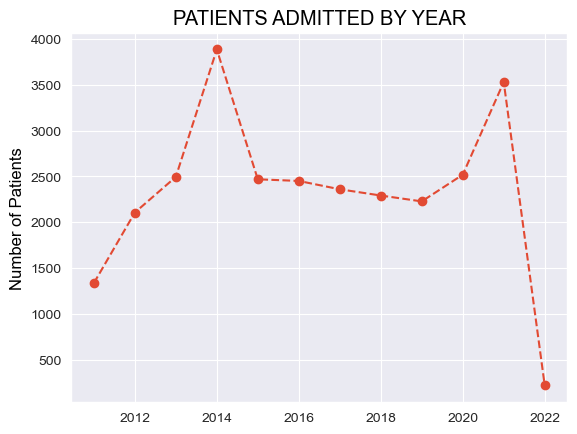

In [375]:
patients_admitted_by_year.plot(kind="line",
                               linestyle="--",
                               marker="o",
                               label="line with marker")
plt.title("PATIENTS ADMITTED BY YEAR",
          color="black")
plt.ylabel("Number of Patients",
           color="black")
plt.xlabel("") 
print("The total patients admitted or readmitted by year represented by a line graph.") 


###### Total Patients Admitted by Month

In [128]:
month = encounters["Encounters_Start"].dt.month
patients_admitted_by_month = encounters.groupby(month)["Id"].count()
patients_admitted_by_month

Encounters_Start
1     2217
2     3028
3     2688
4     2312
5     2374
6     2181
7     2182
8     2129
9     2113
10    2087
11    2333
12    2247
Name: Id, dtype: int64

The total patients admitted or readmitted by month represented by a line graph.


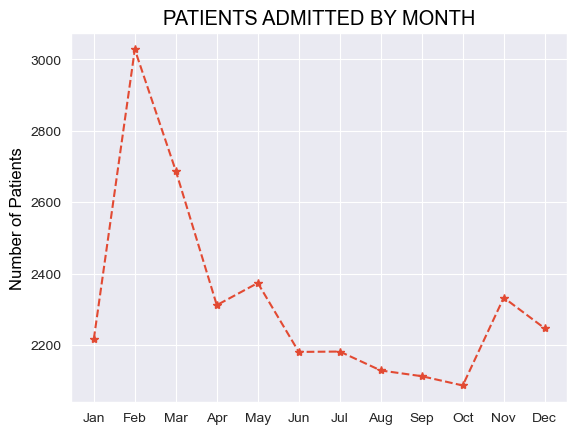

In [376]:
patients_admitted_by_month.plot(kind="line", 
                                linestyle="--",
                                marker="*",
                                label="line with marker") 
plt.title("PATIENTS ADMITTED BY MONTH",
          color="black")
plt.ylabel("Number of Patients",
           color="black") 
plt.xlabel("") 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
print(f"The total patients admitted or readmitted by month represented by a line graph.")


###### Total Patients Admitted by Day

In [100]:
day = encounters["Encounters_Start"].dt.day_name()
patients_admitted_by_day = encounters.groupby(day)["Id"].count().sort_values(ascending=False).reset_index()
patients_admitted_by_day

,Encounters_Start,Id
0,Monday,4405
1,Wednesday,4370
2,Friday,4059
3,Sunday,3973
4,Saturday,3963
5,Tuesday,3644
6,Thursday,3477


The total patients admitted or readmitted by day represented by a bar graph.


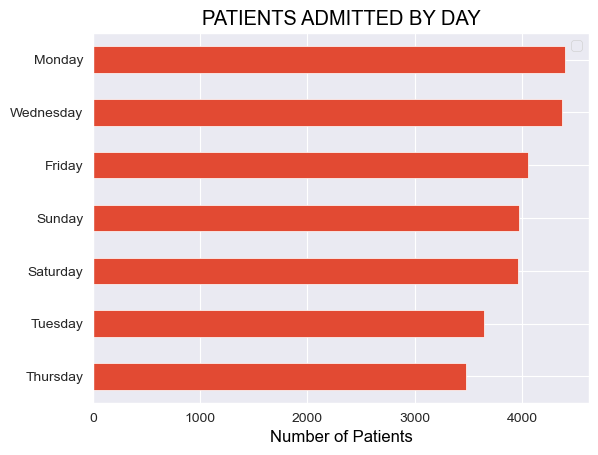

In [378]:
patients_admitted_by_day.sort_values(by="Id", ascending=True).plot(kind="barh")
plt.title("PATIENTS ADMITTED BY DAY",
          color="black")
plt.legend("") 
plt.ylabel("") 
plt.yticks([6,5,4,3,2,1,0],
           ["Monday", "Wednesday", "Friday", "Sunday", "Saturday", "Tuesday", "Thursday"])
plt.xlabel("Number of Patients",
           color="black") 
print("The total patients admitted or readmitted by day represented by a bar graph.")

###### Min Stay in Hospital in Minutes

In [87]:
min_hospital_stay_mins = (encounters["Encounters_Stop"] - encounters["Encounters_Start"]) / pd.Timedelta(minutes=1)
min_hospital_stay_mins = min_hospital_stay_mins.min()
min_hospital_stay_mins
print(f"The minimum patients stay in the hospital was {int(min_hospital_stay_mins)} minutes.") 

The minimum patients stay in the hospital was 15 minutes.


###### Max Stay in Hospital in Hours

In [267]:
max_hospital_stay_hrs = (encounters.Encounters_Stop - encounters.Encounters_Start) / pd.Timedelta(hours=1)
max_hospital_stay_hrs = max_hospital_stay_hrs.max()
max_hospital_stay_hrs
print(f"The maximum patients stay in the hospital was {int(max_hospital_stay_hrs):,} hours, which is 5 years.") 

The maximum patients stay in the hospital was 44,930 hours, which is 5 years.


###### Max Base Cost Per Visit

In [94]:
max_base_cost = encounters.BASE_ENCOUNTER_COST.max()
max_base_cost
print(f"The maximum base cost per visit for patients is ${max_base_cost}.") 

The maximum base cost per visit for patients is $146.18.


###### Min Base Cost Per Visit

In [95]:
min_base_cost = encounters.BASE_ENCOUNTER_COST.min()
min_base_cost
print(f"The minimum base cost per visit for patients is ${min_base_cost}.")

The minimum base cost per visit for patients is $85.55.


###### Avg Base Cost Per Visit by Encounter Class

In [157]:
avg_base_cost_by_eclass = encounters.groupby("ENCOUNTERCLASS")["BASE_ENCOUNTER_COST"].mean().sort_values(ascending=False)
avg_base_cost_by_eclass = avg_base_cost_by_eclass.reset_index().set_index("ENCOUNTERCLASS") 
avg_base_cost_by_eclass = round(avg_base_cost_by_eclass, 2)
avg_base_cost_by_eclass


,BASE_ENCOUNTER_COST
ENCOUNTERCLASS,
emergency,145.25
urgentcare,142.58
wellness,136.80
inpatient,113.67
ambulatory,105.73
outpatient,105.04


The average base cost per visit by encounter class represented by a bar graph.


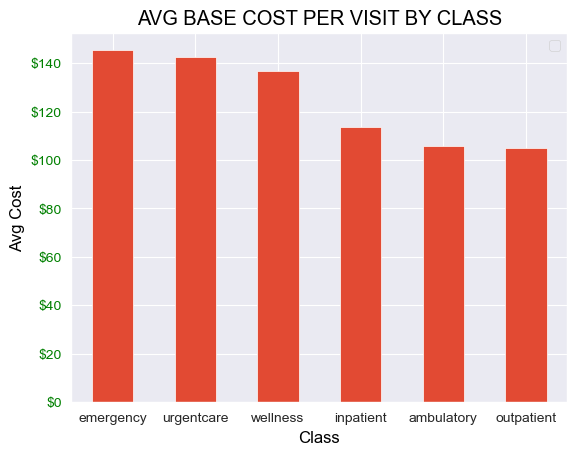

In [379]:
avg_base_cost_by_eclass.plot(kind="bar",
                             rot=0)
plt.title("AVG BASE COST PER VISIT BY CLASS",
          color="black")
plt.legend("") 
cost = list(range(0,160,20))
plt.yticks(cost, [f"${c}" for c in cost],
           color='green')
plt.ylabel("Avg Cost",
           color="black")
plt.xlabel("Class",
           color="black")
print(f"The average base cost per visit by encounter class represented by a bar graph.") 

###### Avg Base Cost Per Visit by Gender

In [187]:
encounters["Key"] = encounters["PATIENT"]
patients["Key"] = patients["Id"]
encounters_patients = pd.merge(encounters, patients, how="inner", on="Key")
encounters_patients.head()
avg_base_cost_by_gender = encounters_patients.groupby("GENDER")["BASE_ENCOUNTER_COST"].mean().sort_values(ascending=False)
avg_base_cost_by_gender = round(avg_base_cost_by_gender, 2).reset_index().set_index("GENDER")
avg_base_cost_by_gender


,BASE_ENCOUNTER_COST
GENDER,
M,117.21
F,115.29


The pecentages of the avgerage base cost per visit by gender represented by this pie chart.


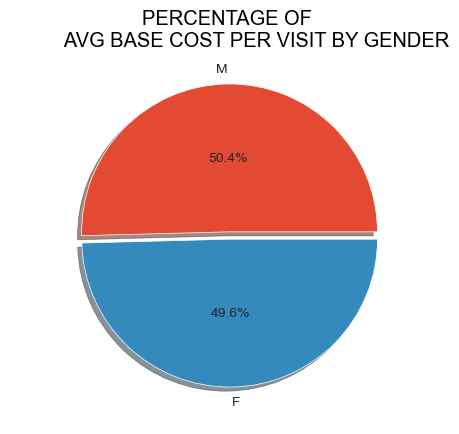

In [230]:
e = (0.05, 0)
avg_base_cost_by_gender["BASE_ENCOUNTER_COST"].plot(kind="pie",
                                                    autopct="%1.1f%%",
                                                    shadow=True,
                                                    explode=e,
                                                    pctdistance=.5)
plt.title("""PERCENTAGE OF 
          AVG BASE COST PER VISIT BY GENDER""",
          color="black")
plt.ylabel("")
print(f"The pecentages of the avgerage base cost per visit by gender represented by this pie chart.") 


###### Avg Base Cost Per Visit by Race

In [151]:
avg_base_cost_by_race = encounters_patients.groupby("RACE")["BASE_ENCOUNTER_COST"].mean().sort_values(ascending=False)
avg_base_cost_by_race = round(avg_base_cost_by_race, 2).reset_index().set_index("RACE")
avg_base_cost_by_race


,BASE_ENCOUNTER_COST
RACE,
native,123.92
hawaiian,123.69
asian,121.53
black,121.16
other,120.93
white,113.81


The percentages of the average base cost per visit by gender is represented by this pie chart.


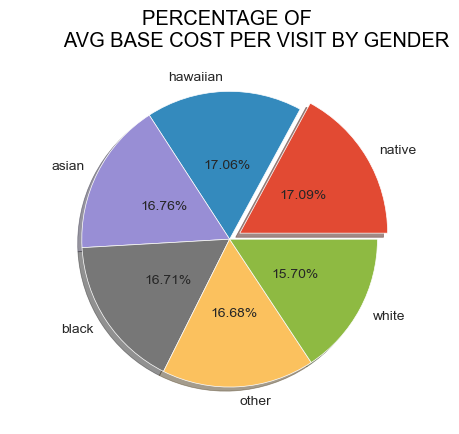

In [229]:
e = (0.08, 0, 0, 0, 0, 0)
avg_base_cost_by_race["BASE_ENCOUNTER_COST"].plot(kind="pie",
                                                  autopct="%.2f%%",
                                                  explode=e,
                                                  shadow=True,
                                                  pctdistance=.5)
plt.title("""PERCENTAGE OF 
          AVG BASE COST PER VISIT BY GENDER""",
          color="black")
plt.ylabel("")
print(f"The percentages of the average base cost per visit by gender is represented by this pie chart.")

###### Avg Base Cost Per Visit by Marital Status

In [232]:
avg_base_cost_by_marital = encounters_patients.groupby("MARITAL")["BASE_ENCOUNTER_COST"].mean()
avg_base_cost_by_marital = round(avg_base_cost_by_marital, 2).reset_index().set_index("MARITAL") 
avg_base_cost_by_marital

,BASE_ENCOUNTER_COST
MARITAL,
M,116.44
S,114.77


The average base cost per visit by marital status is represented in the bar graph.


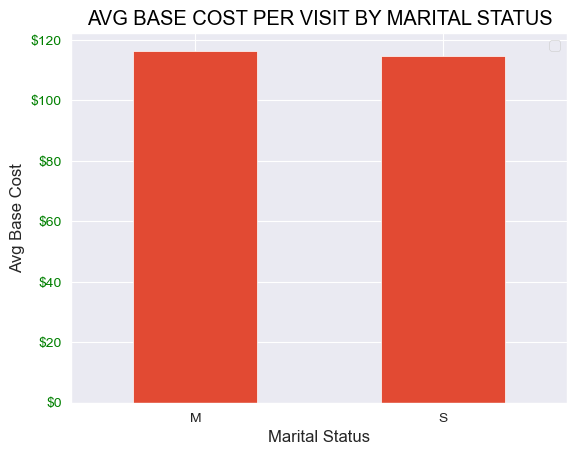

In [381]:
avg_base_cost_by_marital.plot(kind="bar",
                              rot=0)
plt.title("AVG BASE COST PER VISIT BY MARITAL STATUS",
          color="black")
plt.legend("") 
cost = list(range(0,140,20))
plt.yticks(cost, [f"${c}" for c in cost],
           color="green") 
plt.ylabel("Avg Base Cost") 
plt.xlabel("Marital Status") 
print(f"The average base cost per visit by marital status is represented in the bar graph.") 

###### Avg Base Cost Per Visit by City

In [250]:
avg_base_cost_by_city = encounters_patients.groupby("CITY")["BASE_ENCOUNTER_COST"].mean()
avg_base_cost_by_city = round(avg_base_cost_by_city, 2).sort_values(ascending=False).reset_index().set_index("CITY") 
avg_base_cost_by_city

,BASE_ENCOUNTER_COST
CITY,
Milton,143.78
Newton,142.58
Watertown,142.58
Waltham,142.58
Belmont,142.58
Norwell,135.68
Brookline,130.93
Cohasset,130.26
Cambridge,129.89


The average base cost per visit by city is represented in a bar graph.


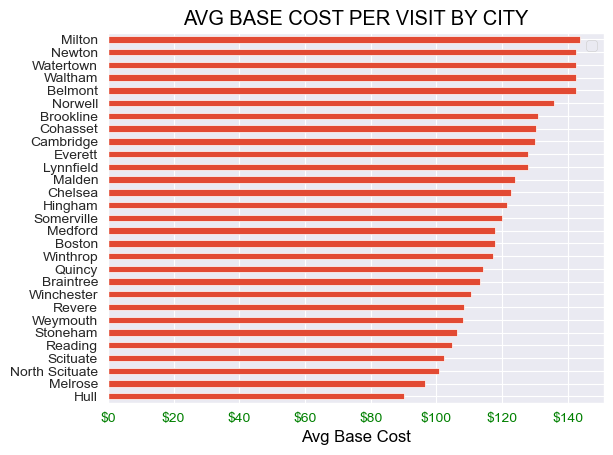

In [382]:
avg_base_cost_by_city.sort_values(by="BASE_ENCOUNTER_COST", ascending=True).plot(kind="barh") 
plt.title("AVG BASE COST PER VISIT BY CITY",
          color="black") 
plt.legend("") 
plt.ylabel("") 
cost = list(range(0,160,20))
plt.xticks(cost, [f"${c}" for c in cost],
           color="green") 
plt.xlabel("Avg Base Cost",
           color="black") 
print(f"The average base cost per visit by city is represented in a bar graph.")                 


###### Max Total Claim Cost Per Visit

In [260]:
max_total_claim_cost = encounters["TOTAL_CLAIM_COST"].max()
max_total_claim_cost 
print(f"The maximum total claim cost per visit for patients is ${max_total_claim_cost:,}.") 

The maximum total claim cost per visit for patients is $641,882.7.


###### Min Total Claim Cost Per Visit

In [269]:
min_total_claim_cost = encounters["TOTAL_CLAIM_COST"].min()
print(f"The minimum total claim cost per visit for patients is ${min_total_claim_cost}.") 

The minimum total claim cost per visit for patients is $0.0.


###### Avg Total Claim Cost Per Visit by Encounter Class

In [272]:
avg_total_claim_cost_by_class = encounters.groupby("ENCOUNTERCLASS")["TOTAL_CLAIM_COST"].mean()
avg_total_claim_cost_by_class = round(avg_total_claim_cost_by_class, 2).sort_values(ascending=False).reset_index().set_index("ENCOUNTERCLASS")
avg_total_claim_cost_by_class 

,TOTAL_CLAIM_COST
ENCOUNTERCLASS,
inpatient,7761.35
urgentcare,6369.16
emergency,4629.65
wellness,4260.71
ambulatory,2894.11
outpatient,2237.30


The average total claim cost per hospital visit by encounter class represented in a bar graph.


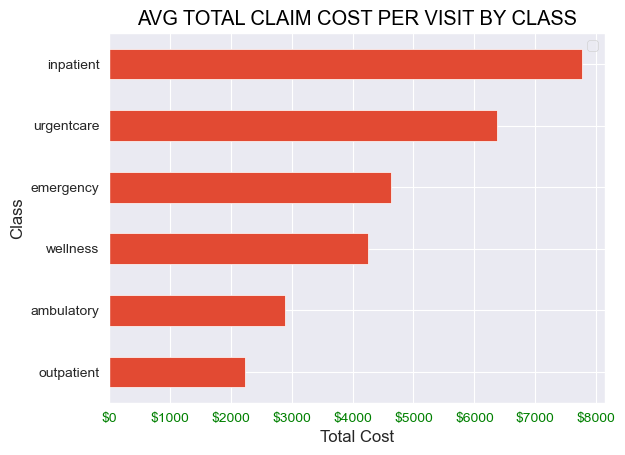

In [383]:
avg_total_claim_cost_by_class.sort_values(by="TOTAL_CLAIM_COST", ascending=True).plot(kind="barh") 
plt.title("AVG TOTAL CLAIM COST PER VISIT BY CLASS",
          color="black") 
plt.legend("") 
plt.ylabel("Class") 
cost = list(range(0,9000,1000))
plt.xticks(cost, [f"${c}" for c in cost],
           color="green") 
plt.xlabel("Total Cost") 
print(f"The average total claim cost per hospital visit by encounter class represented in a bar graph.")

###### Avg Total Claim Cost Per Visit by Gender

In [289]:
avg_total_claim_cost_by_gender = encounters_patients.groupby("GENDER")["TOTAL_CLAIM_COST"].mean()
avg_total_claim_cost_by_gender = round(avg_total_claim_cost_by_gender, 2).reset_index().set_index("GENDER") 
avg_total_claim_cost_by_gender

,TOTAL_CLAIM_COST
GENDER,
F,3252.47
M,4085.33


The percentages of the average total claim cost per visit by gender is represented by this pie chart.


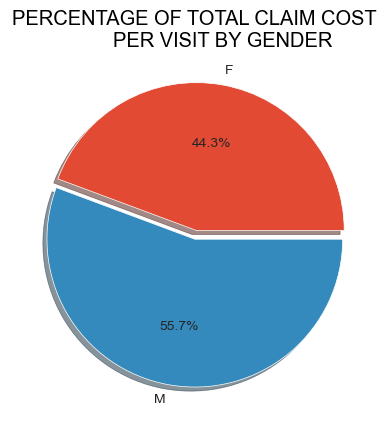

In [298]:
e = (0.06, 0)
avg_total_claim_cost_by_gender["TOTAL_CLAIM_COST"].plot(kind="pie",
                                                        autopct="%1.1f%%",
                                                        shadow=True,
                                                        explode=e) 
plt.title("""PERCENTAGE OF TOTAL CLAIM COST
          PER VISIT BY GENDER""",
          color="black") 
plt.ylabel("") 
print(f"The percentages of the average total claim cost per visit by gender is represented by this pie chart.") 

###### Avg Total Claim Cost Per Visit by Race

In [302]:
avg_total_claim_cost_by_race = encounters_patients.groupby("RACE")["TOTAL_CLAIM_COST"].mean()
avg_total_claim_cost_by_race = round(avg_total_claim_cost_by_race, 2).sort_values(ascending=False).reset_index().set_index("RACE") 
avg_total_claim_cost_by_race

,TOTAL_CLAIM_COST
RACE,
native,7827.50
black,5193.19
hawaiian,4151.51
other,3600.21
white,3230.67
asian,2584.95


The percentages of the total claim cost per visit by race is represented in this pie chart.


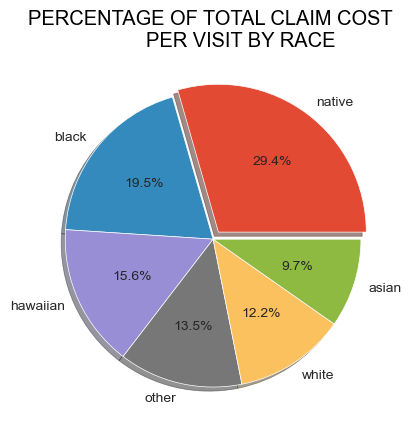

In [305]:
e = (0.06, 0, 0, 0, 0, 0)
avg_total_claim_cost_by_race["TOTAL_CLAIM_COST"].plot(kind="pie",
                                                      shadow=True,
                                                      explode=e,
                                                      autopct="%1.1f%%")
plt.title("""PERCENTAGE OF TOTAL CLAIM COST 
          PER VISIT BY RACE""",
          color="black")
plt.ylabel("") 
print(f"The percentages of the total claim cost per visit by race is represented in this pie chart.") 

###### Avg Total Claim Cost Per Visit by Marital Status

In [307]:
avg_total_claim_cost_by_marital = encounters_patients.groupby("MARITAL")["TOTAL_CLAIM_COST"].mean()
avg_total_claim_cost_by_marital = round(avg_total_claim_cost_by_marital, 2).reset_index().set_index("MARITAL") 
avg_total_claim_cost_by_marital

,TOTAL_CLAIM_COST
MARITAL,
M,3760.56
S,2972.97


The average total claim cost per visit by marital status is represented in the bar graph.


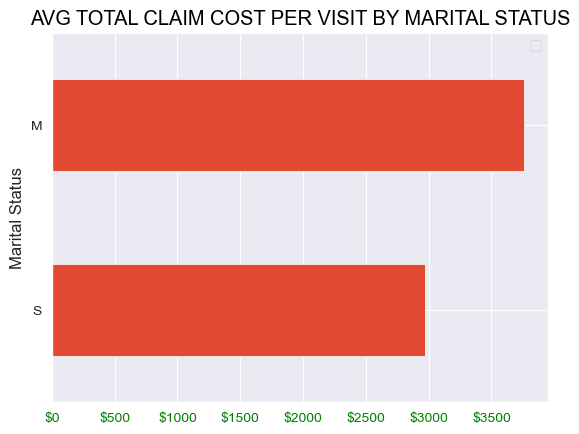

In [385]:
avg_total_claim_cost_by_marital.sort_values(by="TOTAL_CLAIM_COST", ascending=True).plot(kind="barh") 
plt.title("AVG TOTAL CLAIM COST PER VISIT BY MARITAL STATUS",
          color="black")
plt.legend("") 
plt.ylabel("Marital Status") 
cost = list(range(0,3600,500))
plt.xticks(cost, [f"${c}" for c in cost],
                  color="green") 
print(f"The average total claim cost per visit by marital status is represented in the bar graph.") 

###### Avg Total Claim Cost Per Visit by City

In [326]:
avg_total_claim_cost_by_city = encounters_patients.groupby("CITY")["TOTAL_CLAIM_COST"].mean()
avg_total_claim_cost_by_city = round(avg_total_claim_cost_by_city, 2).sort_values(ascending=False).reset_index().set_index("CITY") 
avg_total_claim_cost_by_city

,TOTAL_CLAIM_COST
CITY,
Melrose,16409.28
Norwell,11507.13
Cohasset,7388.09
Brookline,6982.40
Somerville,5604.49
Hingham,5236.94
Everett,5027.43
Boston,4113.87
Newton,4029.69


The average total claim cost per visit by city is represented in this horizontal bar graph.


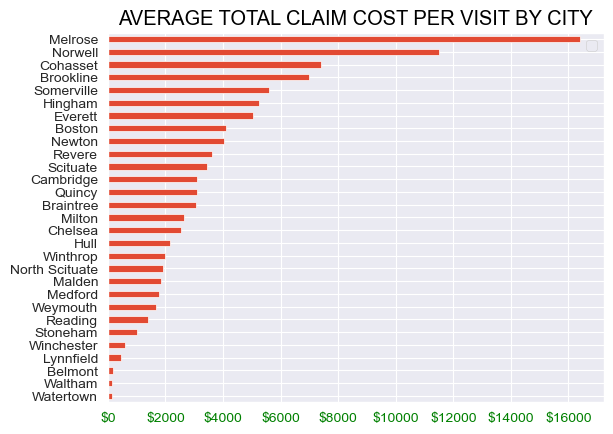

In [331]:
avg_total_claim_cost_by_city.sort_values(by="TOTAL_CLAIM_COST", ascending=True).plot(kind="barh") 
plt.title("AVERAGE TOTAL CLAIM COST PER VISIT BY CITY", 
          color="black") 
plt.legend("") 
plt.ylabel("") 
cost = list(range(0,17000,2000))
plt.xticks(cost, [f"${c}" for c in cost],
           color="green") 
print(f"The average total claim cost per visit by city is represented in this horizontal bar graph.") 

###### Number of Procedures Covered by Insurance Type

In [371]:
insurance_covered_procedures_by_type = encounters_procedures_payers[encounters_procedures_payers["NAME"] != "NO_INSURANCE"].NAME.value_counts().reset_index()
insurance_covered_procedures_by_type = insurance_covered_procedures_by_type.rename(columns={"index": "InsuranceType", "NAME": "Number or Procedures"}).set_index("InsuranceType") 
insurance_covered_procedures_by_type

,Number or Procedures
InsuranceType,
Medicare,19512
Medicaid,2893
Humana,1999
Cigna Health,1599
Blue Cross Blue Shield,1512
Aetna,1457
UnitedHealthcare,1262
Anthem,1203
Dual Eligible,1162


Medicare insurance covers the most procedures under insurance, covering 19,512 procedures. While Medicaid covers the second most procedures under insurace, covering 2,893 procedures.

###### Number of Procedures Covered by Insurance Type by Gender

In [372]:
patients["PATIENT_x"] = patients["Id"]
encounters_procedures_payers_patients = pd.merge(encounters_procedures_payers, patients, how="inner", on="PATIENT_x") 
num_of_procedures_by_insurance_type = encounters_procedures_payers_patients[encounters_procedures_payers_patients["NAME"] != "NO_INSURANCE"].groupby(["NAME", "GENDER"])["ENCOUNTER"].count().sort_values(ascending=False).reset_index().set_index("NAME")
num_of_procedures_by_insurance_type


,GENDER,ENCOUNTER
NAME,,
Medicare,M,11487
Medicare,F,8025
Medicaid,F,2499
Humana,F,1149
Cigna Health,F,1034
Blue Cross Blue Shield,F,1013
UnitedHealthcare,F,857
Humana,M,850
Aetna,F,836


###### Number of Procedures Covered by Insurance by Country

In [374]:
num_of_procedures_by_country = encounters_procedures_payers_patients[encounters_procedures_payers_patients["NAME"] != "NO_INSURANCE"].groupby("Birth_Country")["ENCOUNTER"].count().sort_values(ascending=False).reset_index().set_index("Birth_Country") 
num_of_procedures_by_country


,ENCOUNTER
Birth_Country,
US,28786
MX,708
DE,486
HN,345
DM,297
PR,273
VN,243
CN,232
SA,195


This is the conclusion of my Python Hospital Patient Records project. In this project I have demonstrated how to read in multiple csv files and store them as pandas dataframes, I have demonstrated how to examine, clean, and manipulate data of various types, such as datetime data to extract the values necessary for analysis. I have demonstrated how to perform inner joins to combine data on multiple dataframes to find values and answer business questions. Lastly, I have demonstrated how to construct a variety of line and bar graphs, as well as pie charts to accurately represent data visuals.